In [15]:
import numpy as np
import pandas as pd

## 1.How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Soln. Total number of multiplications is m *n * k
        and
      Total number of additions is m * n * (k-1)
      Each row has k elements and they will be multiplied for n rows with m columns, thus the multiplications will be m * n * k.
      For the additions we have (k-1) instead of k because we have to add these k multiplications and keep it in the resultant 
      matrix of size n * m.

## 2.Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [13]:
import time

def multiply_matrices_list(a, b):
    n = len(a)
    k = len(a[0])
    m = len(b[0])
    
    result = [[0 for _ in range(m)] for _ in range(n)]
    
    for i in range(n):
        for j in range(m):
            for l in range(k):
                result[i][j] += a[i][l] * b[l][j]
    
    return result

n, k, m = 100, 500, 200
a_mat = [[np.random.randint(0, 100) for _ in range(k)] for _ in range(n)]
b_mat = [[np.random.randint(0, 100) for _ in range(m)] for _ in range(k)]

start_time=time.time()
result_list=multiply_matrices_list(a_mat, b_mat)
end_time=time.time()
time_list=end_time - start_time

print(f"Time taken using lists: {time_list} seconds")

a_mat_np = np.array(a_mat)
b_mat_np = np.array(b_mat)

start_time=time.time()
result_np=np.dot(a_mat_np, b_mat_np)
end_time=time.time()
time_np=end_time - start_time

print(f"Time taken using NumPy: {time_np} seconds")

Time taken using lists: 0.8176753520965576 seconds
Time taken using NumPy: 0.0 seconds


Numpy is faster because it is implemented in C language and it is very optimized to do such complex matrix multiplications, as we increase the size of the matrices the time taken with the conventional python lists start to increase and it is much more better to use numpy arrays.

## 3.Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [19]:
# a better method would be sorting the array first and then finding the middle element
# sorting would take O(nlogn)
import time
import numpy as np

def sort_median(arr):
    arr.sort()
    n = len(arr)
    if n % 2 == 1:
        return arr[n//2]
    else:
        return (arr[n//2 - 1] + arr[n//2]) / 2

arr = np.random.randint(0, 1000000, 1000000).tolist()

start_time = time.time()
median_sort = sort_median(arr)
end_time = time.time()
time_taken_sort = end_time - start_time

print(f"Time taken by sort_median: {time_taken_sort} seconds")
print(f"Median found by sort_median: {median_sort}")


Time taken by sort_median: 0.14327788352966309 seconds
Median found by sort_median: 498904.0


In [17]:
# using the normal/naive approach
def naive_median(arr):
    n = len(arr)
    k = n // 2
    for i in range(k+1):
        max_index = 0
        for j in range(1, n-i):
            if arr[j] > arr[max_index]:
                max_index = j
        arr[max_index], arr[n-i-1] = arr[n-i-1], arr[max_index]
    
    if n % 2 == 1:
        return arr[k]
    else:
        return (arr[k] + arr[k-1]) / 2

arr = np.random.randint(0, 10000, 10000).tolist()

start_time = time.time()
median_naive = naive_median(arr)
end_time = time.time()
time_taken_naive = end_time - start_time

print(f"Time taken by naive_median: {time_taken_naive} seconds")
print(f"Median found by naive_median: {median_naive}")

Time taken by naive_median: 1.1702609062194824 seconds
Median found by naive_median: 4999.5


In [20]:
# using np.median
arr = np.random.randint(0, 1000000, 1000000)

start_time = time.time()
median_numpy = np.median(arr)
end_time = time.time()
time_taken_numpy = end_time - start_time

print(f"Time taken by numpy.median: {time_taken_numpy} seconds")
print(f"Median found by numpy.median: {median_numpy}")

Time taken by numpy.median: 0.01351475715637207 seconds
Median found by numpy.median: 500258.0


#### The naive approach is O(n**2), the sorting approach performs better for smaller input size while the numpy.medain() approach is more better if we consider larger values

## 4.What is the gradient of the following function with respect to x and y?

In [23]:
from IPython.display import display, Math

# Partial derivative with respect to x
partial_x = r'\frac{\partial f}{\partial x} = 2xy + y^3 \cos x'
# Partial derivative with respect to y
partial_y = r'\frac{\partial f}{\partial y} = x^2 + 3y^2 \sin x'

display(Math(partial_x))
display(Math(partial_y))

display(Math(r'\nabla f(x, y) = \left( 2xy + y^3 \cos x, x^2 + 3y^2 \sin x \right)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [25]:
pip install jax

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
    --------------------------------------- 0.0/2.0 MB 435.7 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/2.0 MB 1.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/2.0 MB 1.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.0 MB 984.6 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.0 MB 1.1 MB/s eta 0:00:02
   ----- ---------------------------------- 0.3/2.0 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.3/2.0 MB 1.3 MB/s eta 0:00:02
   ------- -------------------------------- 0.4/2.0 MB 1.1 MB/s eta 0:00:02
   -------- ------------------------------- 0.4/2.0 MB 1.1 MB/s eta 0:00:02
   --------- ------------------------------ 0.5/2.0 MB 1.2 MB/s eta 0:00:02
   --------- ------------------------------ 0.5/2.0 MB 1.2 MB/s eta 0:00:02
   --------- ------------------------------ 0.5/2.0 MB 1.2 MB/s eta 0:00:02
   ----------- 

## 5.Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [33]:
import jax
import jax.numpy as jnp
import numpy as np

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

gradient_f = jax.grad(f, argnums=(0, 1))

# Calculated gradient
def calc_grad_x(x, y):
    return 2 * x * y + y**3 * jnp.cos(x)

def calc_grad_y(x, y):
    return x**2 + 3 * y**2 * jnp.sin(x)

x_values = np.random.rand(3)
y_values = np.random.rand(3)

# Compare the results
for x, y in zip(x_values, y_values):
    grad_jax = gradient_f(x, y)
    grad_calc_x = calc_grad_x(x, y)
    grad_calc_y = calc_grad_y(x, y)

    print(f"x: {x:.4f}, y: {y:.4f}")
    print(f"JAX Gradient: (df/dx: {grad_jax[0]:.4f}, df/dy: {grad_jax[1]:.4f})")
    print(f"Calculated Gradient: (df/dx: {grad_calc_x:.4f}, df/dy: {grad_calc_y:.4f})")
    print(" ")



x: 0.3373, y: 0.4152
JAX Gradient: (df/dx: 0.3477, df/dy: 0.2850)
Calculated Gradient: (df/dx: 0.3477, df/dy: 0.2850)
 
x: 0.0387, y: 0.8506
JAX Gradient: (df/dx: 0.6809, df/dy: 0.0856)
Calculated Gradient: (df/dx: 0.6809, df/dy: 0.0856)
 
x: 0.7936, y: 0.5137
JAX Gradient: (df/dx: 0.9104, df/dy: 1.1942)
Calculated Gradient: (df/dx: 0.9104, df/dy: 1.1942)
 


## 6. Use sympy to confirm that you obtain the same gradient analytically.

In [34]:
import sympy as sp
import numpy as np

x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)
grad_x = sp.diff(f, x)
grad_y = sp.diff(f, y)

# Convert the SymPy expressions to lambda functions for evaluation
grad_x_func = sp.lambdify((x, y), grad_x, 'numpy')
grad_y_func = sp.lambdify((x, y), grad_y, 'numpy')

# Manually calculated gradient functions
def calc_grad_x(x, y):
    return 2 * x * y + y**3 * np.cos(x)

def calc_grad_y(x, y):
    return x**2 + 3 * y**2 * np.sin(x)

x_values = np.random.rand(3)
y_values = np.random.rand(3)

# Compare the results
for x_val, y_val in zip(x_values, y_values):
    grad_calc_x = calc_grad_x(x_val, y_val)
    grad_calc_y = calc_grad_y(x_val, y_val)
    grad_sympy_x = grad_x_func(x_val, y_val)
    grad_sympy_y = grad_y_func(x_val, y_val)

    print(f"x: {x_val:.4f}, y: {y_val:.4f}")
    print(f"Calculated Gradient: (df/dx: {grad_calc_x:.4f}, df/dy: {grad_calc_y:.4f})")
    print(f"SymPy Gradient: (df/dx: {grad_sympy_x:.4f}, df/dy: {grad_sympy_y:.4f})")
    print(" ")


x: 0.7873, y: 0.9917
Calculated Gradient: (df/dx: 2.2500, df/dy: 2.7103)
SymPy Gradient: (df/dx: 2.2500, df/dy: 2.7103)
 
x: 0.5119, y: 0.3946
Calculated Gradient: (df/dx: 0.4576, df/dy: 0.4909)
SymPy Gradient: (df/dx: 0.4576, df/dy: 0.4909)
 
x: 0.2540, y: 0.1759
Calculated Gradient: (df/dx: 0.0946, df/dy: 0.0879)
SymPy Gradient: (df/dx: 0.0946, df/dy: 0.0879)
 


## 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

In [45]:
students_data = {
    2022: {
        "Branch 1": {
            1: {
                "Name": "A",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                    "Science": 90
                }
            },
            2: {
                "Name": "B",
                "Marks": {
                    "Maths": 100,
                    "English": 70,
                    "Science": 90
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "C",
                "Marks": {
                    "Maths": 85,
                    "English": 90,
                    "Science": 85
                }
            }
        }
    },
    2023: {
        "Branch 1": {
            1: {
                "Name": "D",
                "Marks": {
                    "Maths": 85,
                    "English": 95,
                    "Science": 85
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "E",
                "Marks": {
                    "Maths": 85,
                    "English": 95,
                    "Science": 90
                }
            }
        }
    },
    2024: {
        "Branch 1": {
            1: {
                "Name": "F",
                "Marks": {
                    "Maths": 80,
                    "English": 80,
                    "Science": 80
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "G",
                "Marks": {
                    "Maths": 90,
                    "English": 85,
                    "Science": 90
                }
            }
        }
    },
    2025: {
        "Branch 1": {
            1: {
                "Name": "H",
                "Marks": {
                    "Maths": 85,
                    "English": 80,
                    "Science": 75
                }
            }
        },
        "Branch 2": {
            1: {
                "Name": "I",
                "Marks": {
                    "Maths": 70,
                    "English": 70,
                    "Science": 70
                }
            }
        }
    }
}

students_data[2023]["Branch 2"]

{1: {'Name': 'E', 'Marks': {'Maths': 85, 'English': 95, 'Science': 90}}}

## 8.Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [7]:
class Student:
    def __init__(self, name, roll, marks):
        self.name = name
        self.roll = roll
        self.marks = marks   
    
    def __repr__(self):
        return f"name:{self.name}, roll:{self.roll}, marks:{self.marks}"
        
class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []
    
    def add_student(self, student):
        self.students.append(student)
        
    def __repr__(self):
        return f"Branch(Name: {self.name}, Students: {self.students})"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(Year: {self.year}, Branches: {self.branches})"

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database(Years: {self.years})"



In [10]:
db = Database()

year_2022 = Year(2024)

branch_1 = Branch("Branch 1")
branch_2 = Branch("Branch 2")

student_1 = Student(1, "A", {"Maths": 100, "English": 60})
student_2 = Student(2, "B", {"Maths": 80, "English": 80})

branch_1.add_student(student_1)
branch_2.add_student(student_2)

year_2022.add_branch(branch_1)
year_2022.add_branch(branch_2)

db.add_year(year_2022)

print(db)

Database(Years: [Year(Year: 2024, Branches: [Branch(Name: Branch 1, Students: [name:1, roll:A, marks:{'Maths': 100, 'English': 60}]), Branch(Name: Branch 2, Students: [name:2, roll:B, marks:{'Maths': 80, 'English': 80}])])])


## 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

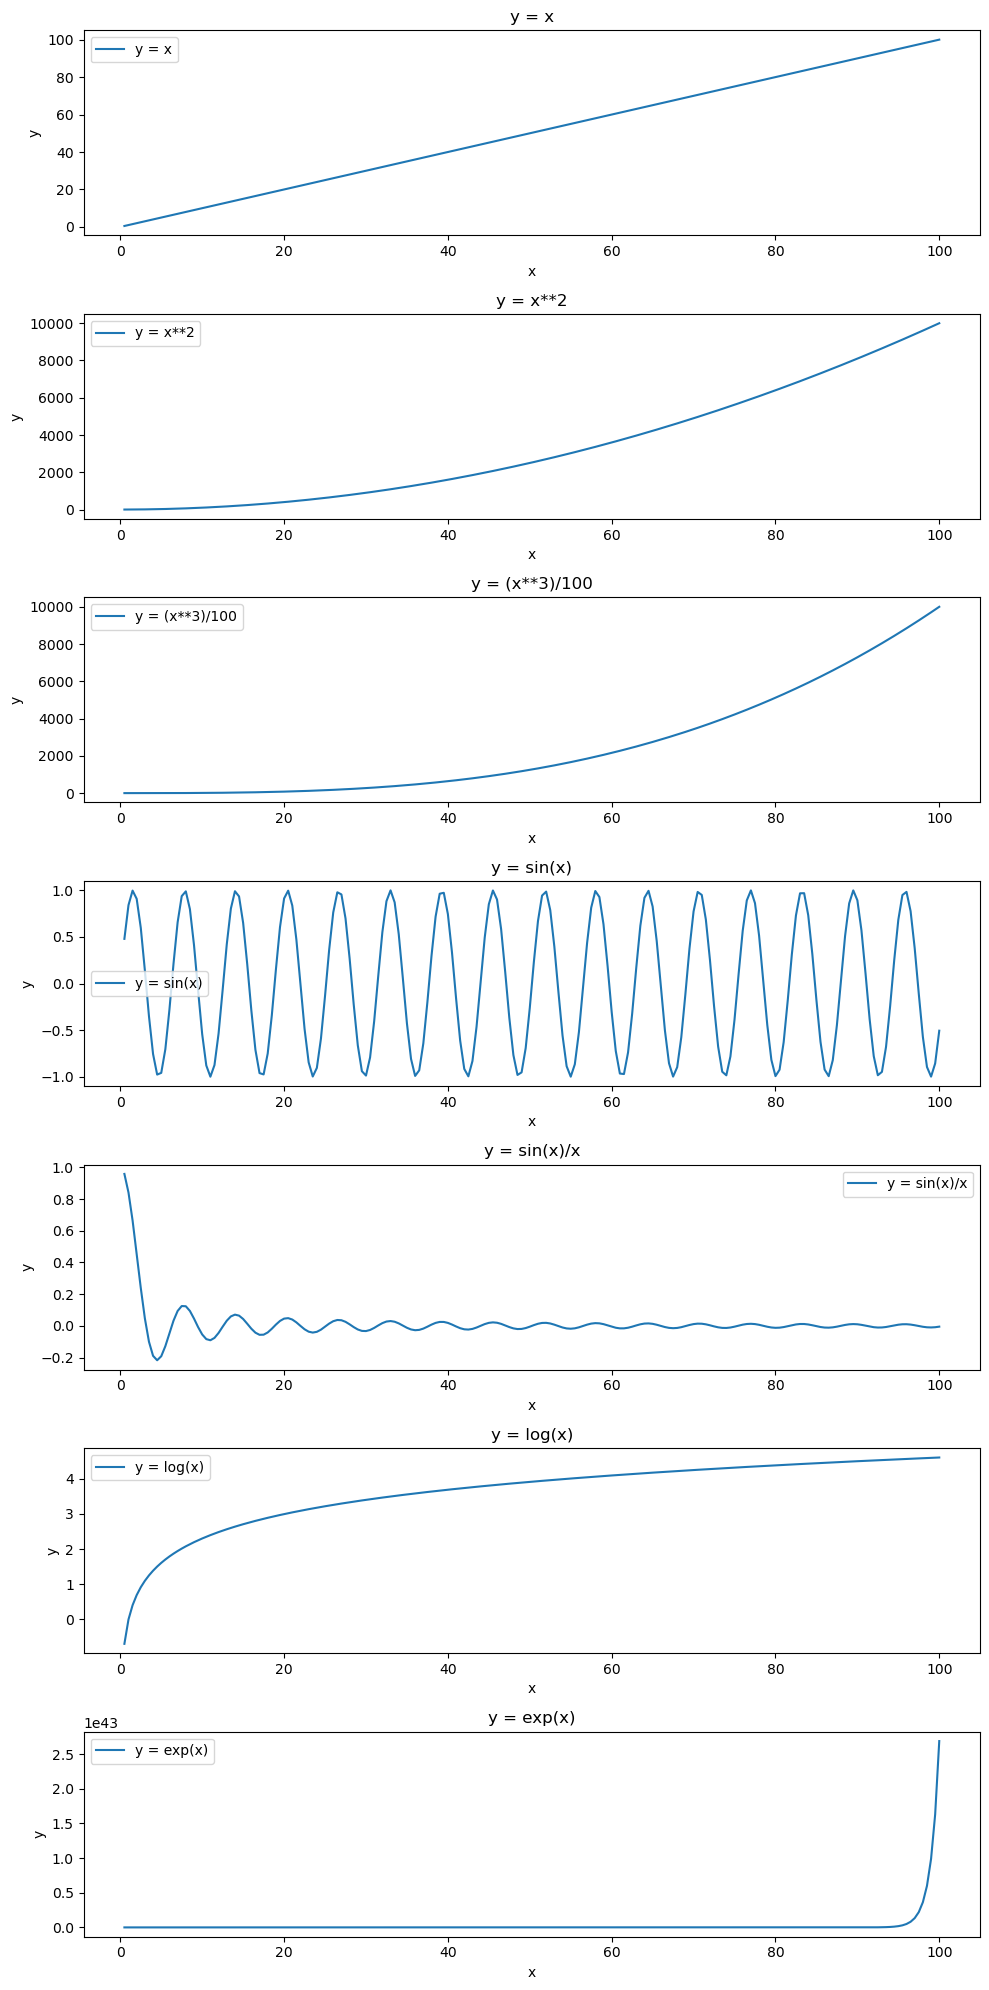

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y1 = x 
y2 = x**2
y3 = (x**3)/100
y4 = np.sin(x)
y5 = np.sin(x)/x
y6 = np.log(x)  
y7 = np.exp(x)  

fig, axs = plt.subplots(7, 1, figsize=(10, 20))

axs[0].plot(x, y1, label='y = x')
axs[0].set_title('y = x')
axs[0].legend()

axs[1].plot(x, y2, label='y = x**2')
axs[1].set_title('y = x**2')
axs[1].legend()

axs[2].plot(x, y3, label='y = (x**3)/100')
axs[2].set_title('y = (x**3)/100')
axs[2].legend()

axs[3].plot(x, y4, label='y = sin(x)')
axs[3].set_title('y = sin(x)')
axs[3].legend()

axs[4].plot(x, y5, label='y = sin(x)/x')
axs[4].set_title('y = sin(x)/x')
axs[4].legend()

axs[5].plot(x, y6, label='y = log(x)')
axs[5].set_title('y = log(x)')
axs[5].legend()

axs[6].plot(x, y7, label='y = exp(x)')
axs[6].set_title('y = exp(x)')
axs[6].legend()

# Set common labels
for ax in axs:
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()


## 10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [14]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

column_with_highest_std = df.std().idxmax()
highest_std = df.std().max()

row_with_lowest_mean = df.mean(axis=1).idxmin()
lowest_mean = df.mean(axis=1).min()

print(f"Column with the highest standard deviation: {column_with_highest_std} (std = {highest_std})")
print(f"Row with the lowest mean: {row_with_lowest_mean} (mean = {lowest_mean})")

Column with the highest standard deviation: e (std = 0.30869662671455234)
Row with the lowest mean: 3 (mean = 1.256343467996491)


## 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [15]:
df["f"] = df.sum(axis=1)
df["g"] = np.where(df["f"] < 8, "LT8", "GT8")
num_rows_lt8 = df[df["g"] == "LT8"].shape[0]
std_f_lt8 = df[df["g"] == "LT8"]["f"].std()
std_f_gt8 = df[df["g"] == "GT8"]["f"].std()

print(f"Number of rows where 'g' is 'LT8': {num_rows_lt8}")
print(f"Standard deviation of 'f' where 'g' is 'LT8': {std_f_lt8}")
print(f"Standard deviation of 'f' where 'g' is 'GT8': {std_f_gt8}")

Number of rows where 'g' is 'LT8': 14
Standard deviation of 'f' where 'g' is 'LT8': 0.45243568390679234
Standard deviation of 'f' where 'g' is 'GT8': 0.21259335401445295


## 12.Write a small piece of code to explain broadcasting in numpy.

#### Brodcasting is a feature in numpy which allows us to perform arithematic operations with numpy arrays/matrices which are not of same dimension. The numpy arrays adjust themselves in such a way to make the operations possible

In [18]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([1, 5, 1])

C = A + B

print("Matrix A:")
print(A)
print("\nRow vector B:")
print(b)
print("\nResult of A + B:")
print(C)


Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Row vector B:
[1 5 1]

Result of A + B:
[[ 2  7  4]
 [ 5 10  7]
 [ 8 13 10]]


## 13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [20]:
import numpy as np

def calc_argmin(arr):
    min_index = 0
    min_value = arr[0]
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index

array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 2, 6, 7, 1])
custom_index = calc_argmin(array)
np_index = np.argmin(array)

print(f"Custom argmin index: {custom_index}")
print(f"NumPy argmin index: {np_index}")

Custom argmin index: 1
NumPy argmin index: 1
